# Step-by-step Cloths Segmentation

### Import and download packages

In [1]:
%matplotlib inline
from pylab import imshow
import numpy as np
import cv2
import torch
import albumentations as albu

c:\Users\gutot\Desktop\RecPadroes\cloths_segmentation\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip install iglovikov_helper_functions


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [4]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null

The system cannot find the path specified.


In [5]:
!pip install cloths_segmentation  > /dev/null

The system cannot find the path specified.


### Import pre-trained model and create newral network

In [6]:
from cloths_segmentation.pre_trained_models import create_model
model = create_model("Unet_2020-10-30")
model.eval()

c:\Users\gutot\Desktop\RecPadroes\cloths_segmentation\venv\lib\site-packages\torch\hub.py:651: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


Unet(
  (encoder): EfficientNetEncoder(
    (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): Swish()
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
          (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): Swish()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (act1): Swish()
            (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

### Load image

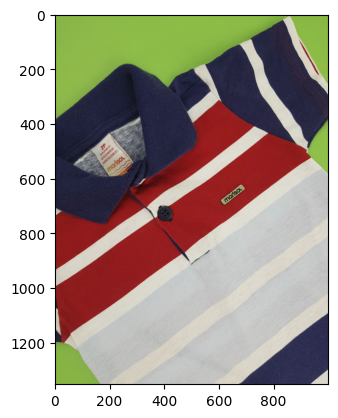

In [7]:
image = load_rgb("images/RCMSG02STP0003_2.jpg")
imshow(image)

In [8]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [9]:
with torch.no_grad():
  prediction = model(x)[0][0]

### Create mask

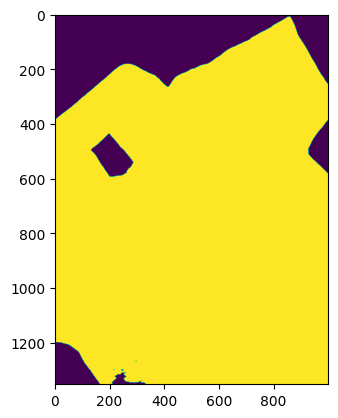

In [10]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)
mask = unpad(mask, pads)
imshow(mask)

### Filter image using mask

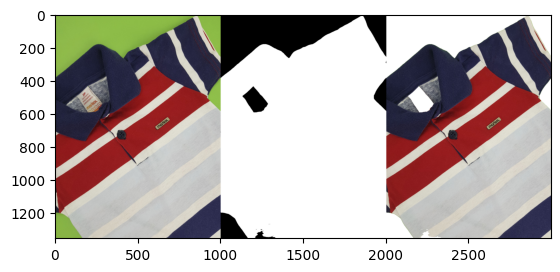

In [11]:
mask_black_white = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255
imshow(np.hstack([image, mask_black_white, cv2.add(image, ~mask_black_white)]))